# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
df = pd.read_csv('Banking Project.csv')

In [78]:
df.head(5)

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


In [74]:
df.shape

(5000, 40)

In [75]:
df.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Age', 'Gender', 'Address',
       'City', 'Contact Number', 'Email', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'TransactionID',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Branch ID', 'Loan ID',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term',
       'Approval/Rejection Date', 'Loan Status', 'CardID', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due',
       'Payment Due Date', 'Last Credit Card Payment Date', 'Rewards Points',
       'Feedback ID', 'Feedback Date', 'Feedback Type', 'Resolution Status',
       'Resolution Date', 'Anomaly'],
      dtype='object')

In [79]:
# Remove column names
df.columns = df.columns.str.strip()
# 2. Remove commas and spaces from Account Balance
df['Account Balance'] = df['Account Balance'].str.replace(',', '').str.strip()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   object 
 11  Date Of Account Opening            5000 non-null   objec

In [68]:
# Generating descriptive statistics
df.describe()

,Customer ID,Age,Contact Number,TransactionID,Branch ID,Loan ID,Loan Term,CardID,Minimum Payment Due,Rewards Points,Feedback ID,Anomaly
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.469800,1.945880e+10,2500.500000,50.586800,2500.500000,36.520800,2500.500000,124.370134,4966.161800,2500.500000,0.880000
std,1443.520003,15.145672,1.443520e+03,1443.520003,28.499539,1443.520003,16.924315,1443.520003,72.340102,2901.410915,1443.520003,0.475021
min,1.000000,18.000000,1.945879e+10,1.000000,1.000000,1.000000,12.000000,1.000000,0.070000,1.000000,1.000000,-1.000000
25%,1250.750000,30.000000,1.945880e+10,1250.750000,26.000000,1250.750000,24.000000,1250.750000,62.180000,2475.250000,1250.750000,1.000000
50%,2500.500000,43.000000,1.945880e+10,2500.500000,50.000000,2500.500000,36.000000,2500.500000,123.080000,4950.500000,2500.500000,1.000000
75%,3750.250000,57.000000,1.945880e+10,3750.250000,75.000000,3750.250000,48.000000,3750.250000,186.125000,7483.250000,3750.250000,1.000000
max,5000.000000,69.000000,1.945880e+10,5000.000000,99.000000,5000.000000,60.000000,5000.000000,249.860000,9999.000000,5000.000000,1.000000


In [80]:
# convert to float
df['Account Balance'] = pd.to_numeric(df['Account Balance'], errors='coerce')

In [81]:
df['Account Balance'].max()

np.float64(9998.11)

In [82]:
df['Account Balance'].min()

np.float64(107.2)

In [83]:
df['Account Balance'].mean()

np.float64(5060.570918)

In [88]:
bins =[0, 1500, 6000,float('inf')]
labels = ['low', 'Medium', 'High']
df['Income Band'] = pd.cut(df['Account Balance'], bins=bins,labels=labels, right=False)

<Axes: xlabel='Income Band'>

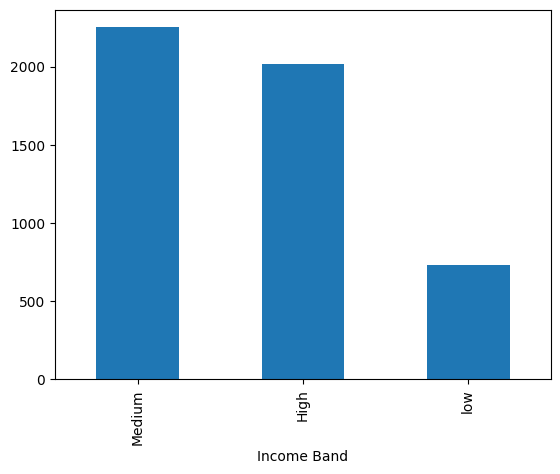

In [89]:
df['Income Band'].value_counts().plot(kind='bar')

In [93]:
# Examine the distribution of unique categories in categorical columns

categorical_cols = df[['Branch ID','Account Type','Loan Type', 'Gender','Loan ID', 'Card Type','Anomaly','Feedback Date','Feedback Type','Resolution Status','Income Band']].columns
for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())

Value Counts for 'Branch ID':


Branch ID
45    66
78    64
62    63
27    62
58    62
      ..
60    37
69    36
54    36
16    36
40    31
Name: count, Length: 99, dtype: int64

Value Counts for 'Account Type':


Account Type
Savings    2507
Current    2493
Name: count, dtype: int64

Value Counts for 'Loan Type':


Loan Type
Mortgage    1712
Auto        1645
Personal    1643
Name: count, dtype: int64

Value Counts for 'Gender':


Gender
Female    1727
Other     1639
Male      1634
Name: count, dtype: int64

Value Counts for 'Loan ID':


Loan ID
5000    1
1       1
2       1
3       1
4       1
       ..
13      1
12      1
11      1
10      1
9       1
Name: count, Length: 5000, dtype: int64

Value Counts for 'Card Type':


Card Type
MasterCard    1696
AMEX          1679
Visa          1625
Name: count, dtype: int64

Value Counts for 'Anomaly':


Anomaly
 1    4700
-1     300
Name: count, dtype: int64

Value Counts for 'Feedback Date':


Feedback Date
11/20/2023    29
5/23/2023     26
12/29/2023    24
7/2/2023      23
12/12/2023    23
              ..
5/6/2023       6
12/16/2023     6
6/2/2023       6
12/2/2023      5
2/28/2023      4
Name: count, Length: 365, dtype: int64

Value Counts for 'Feedback Type':


Feedback Type
Suggestion    1689
Complaint     1681
Praise        1630
Name: count, dtype: int64

Value Counts for 'Resolution Status':


Resolution Status
Pending     2504
Resolved    2496
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Medium    2252
High      2016
low        732
Name: count, dtype: int64

# Univariate Analysis 

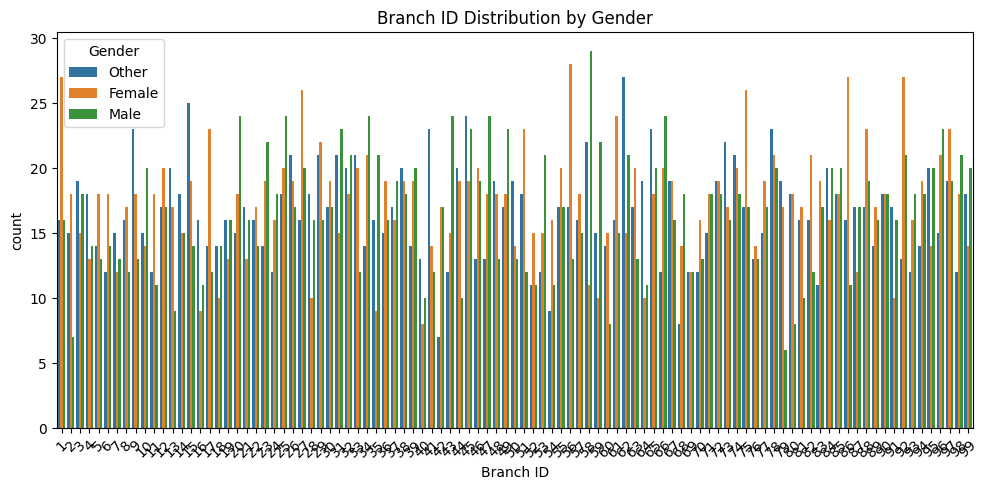

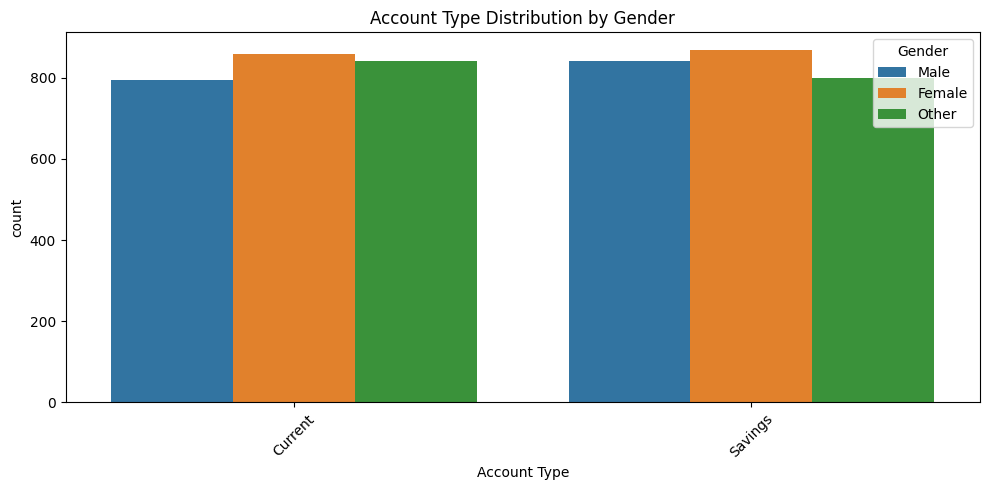

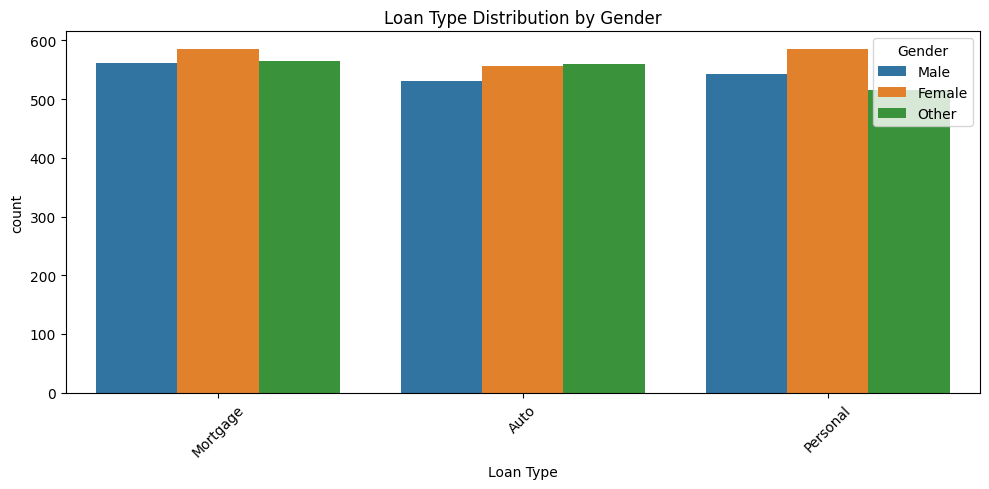

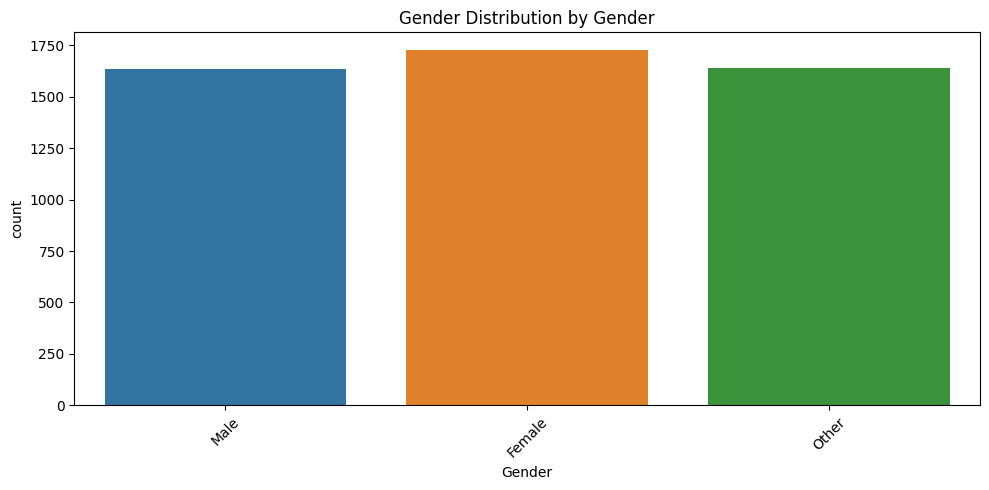

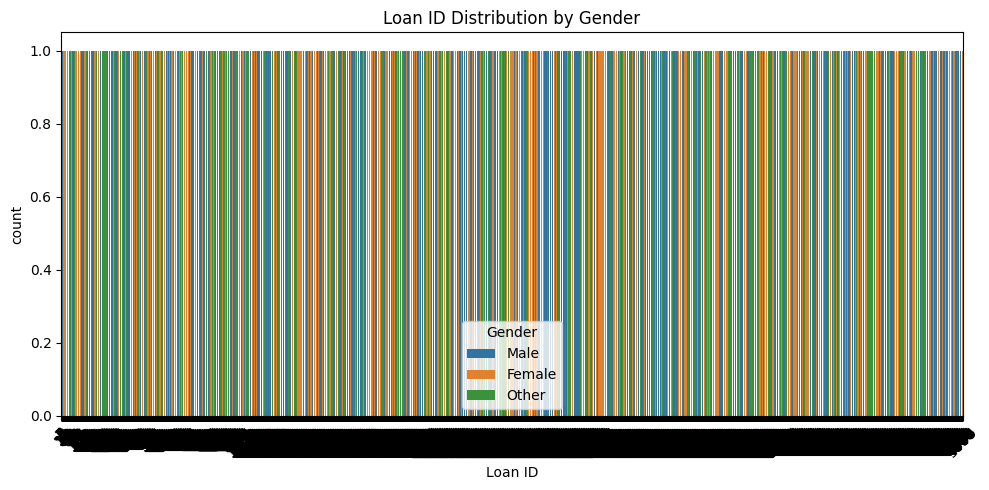

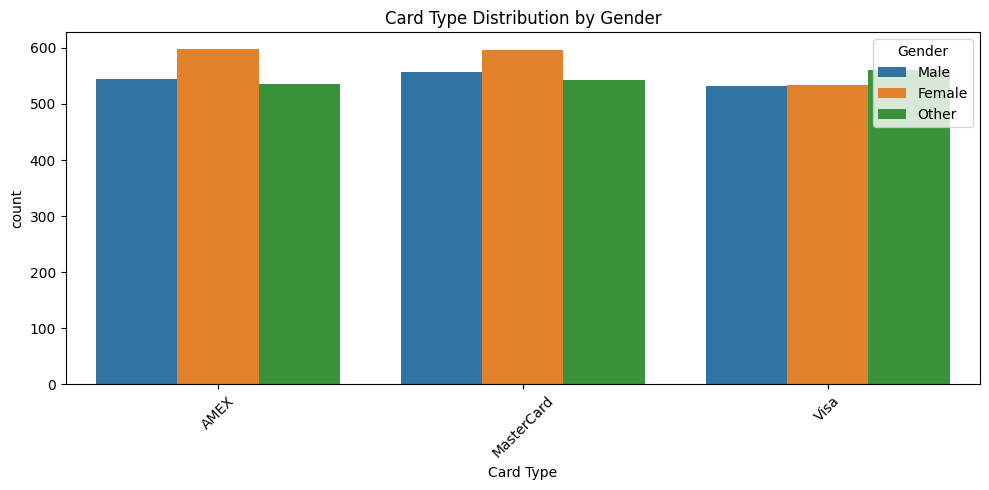

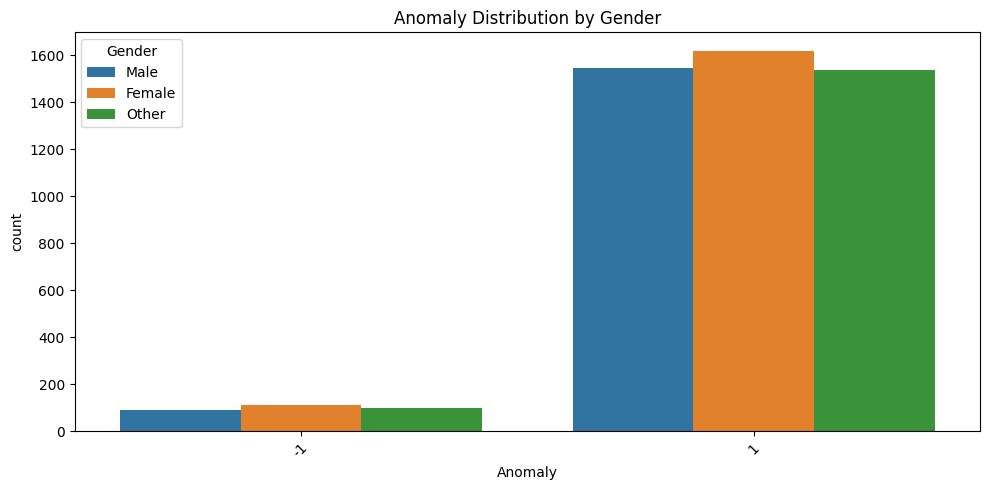

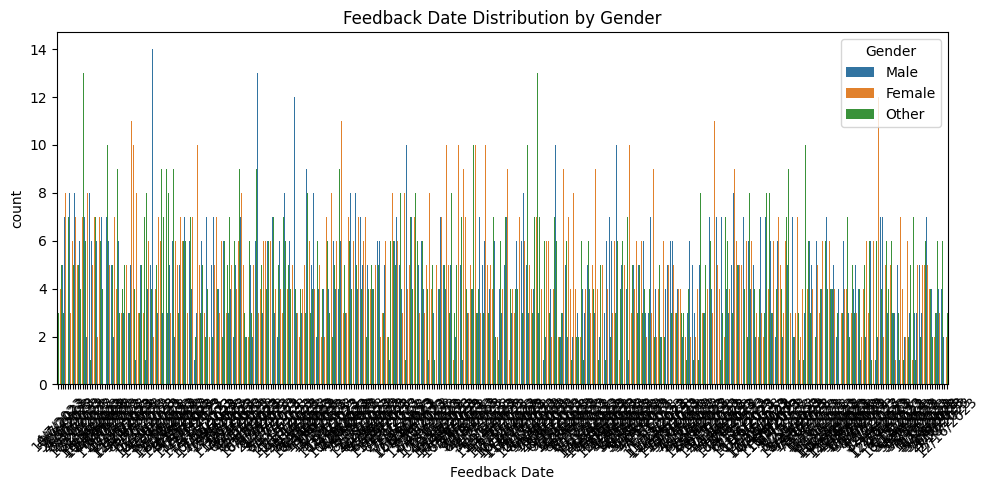

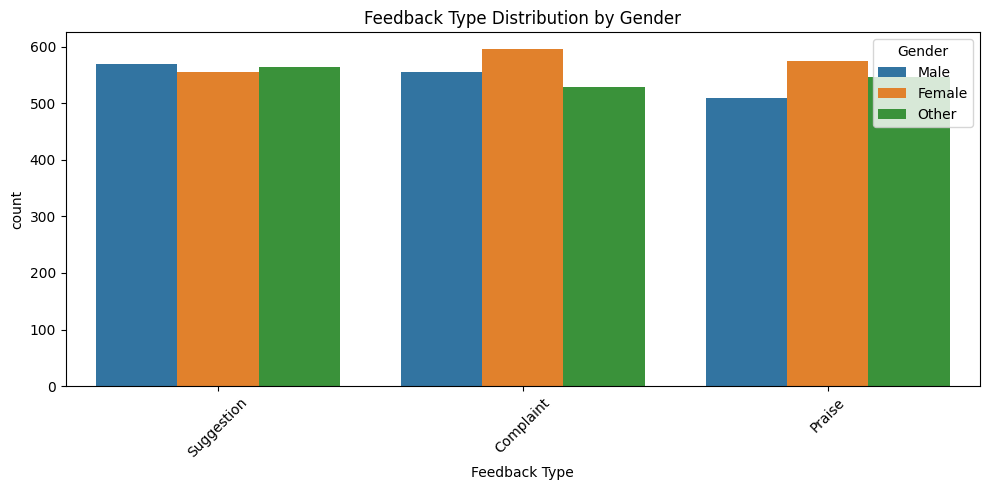

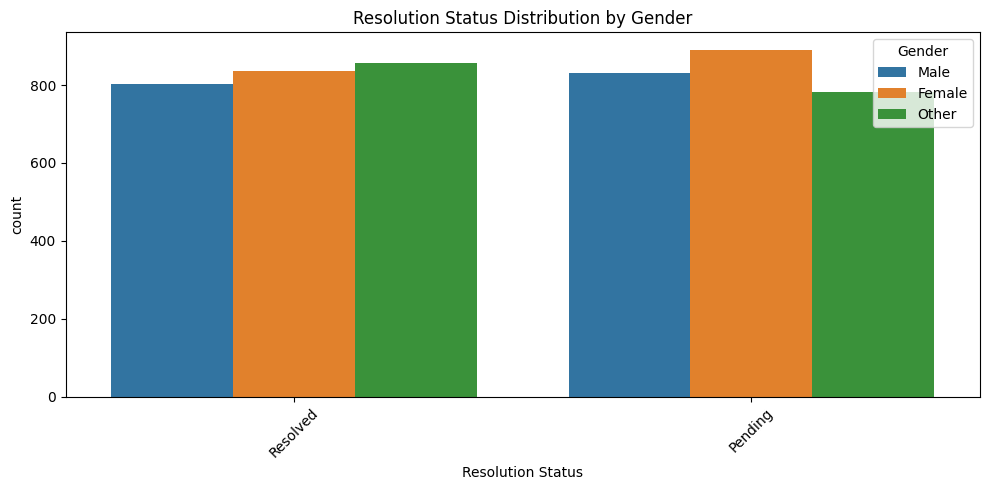

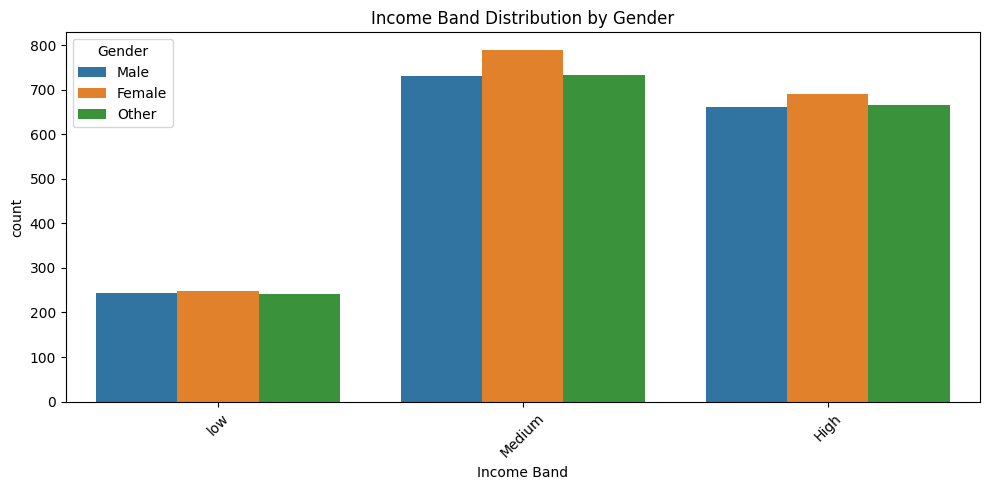

In [98]:
for i, predictor in enumerate(df[['Branch ID','Account Type','Loan Type', 'Gender','Loan ID', 'Card Type','Anomaly','Feedback Date','Feedback Type','Resolution Status','Income Band']]):
    plt.figure(i)
    sns.countplot(data=df, x = predictor, hue='Gender')

# Bivariate Analysis

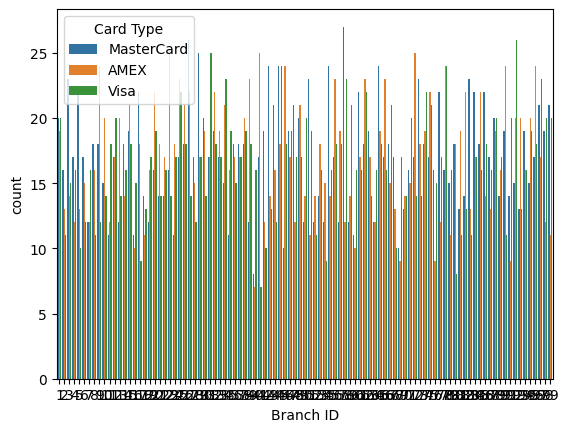

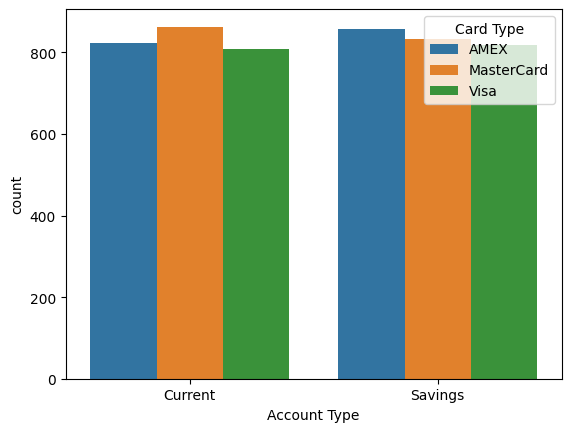

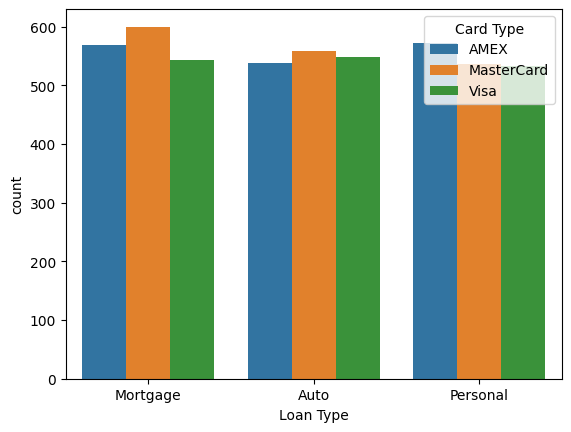

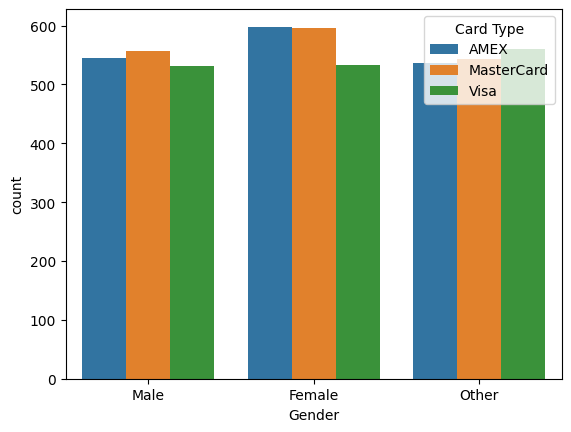

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


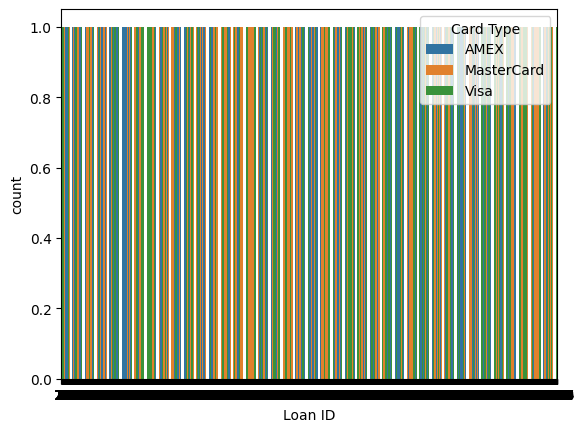

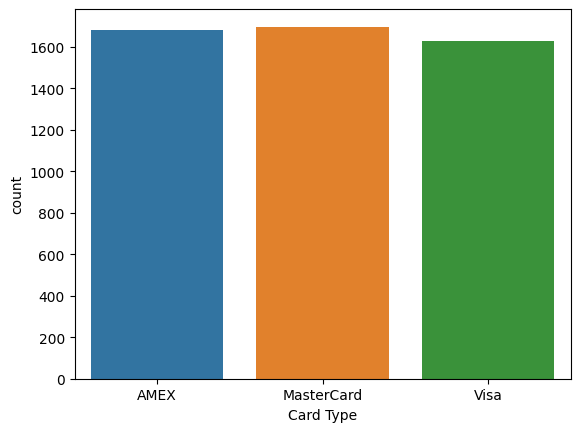

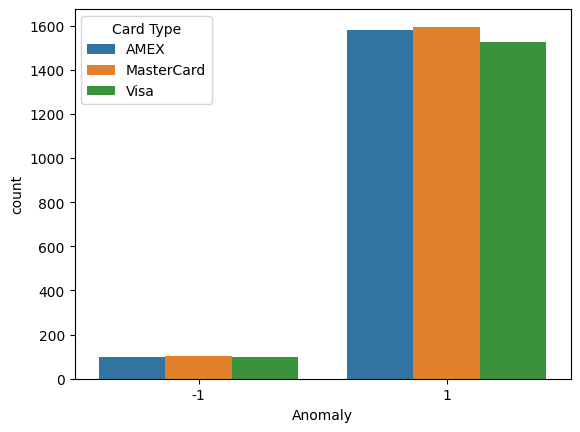

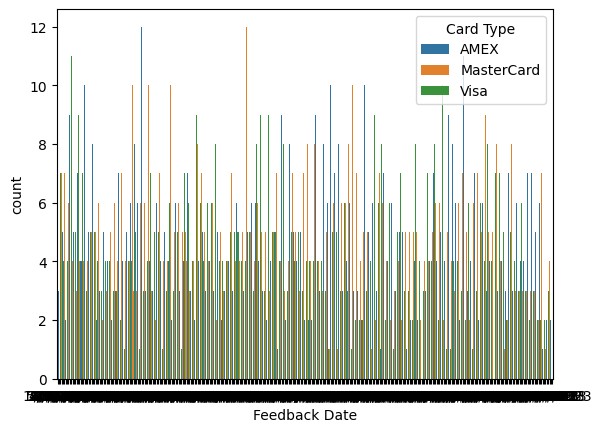

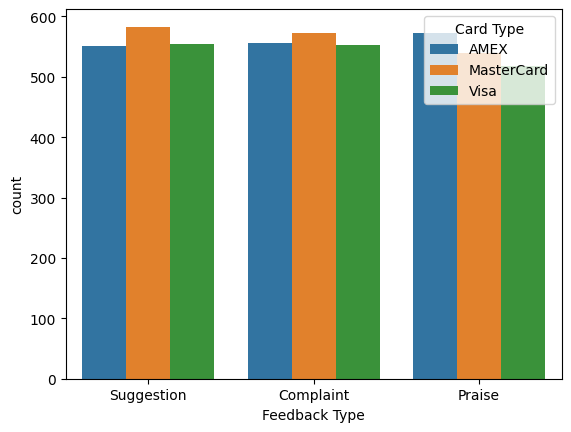

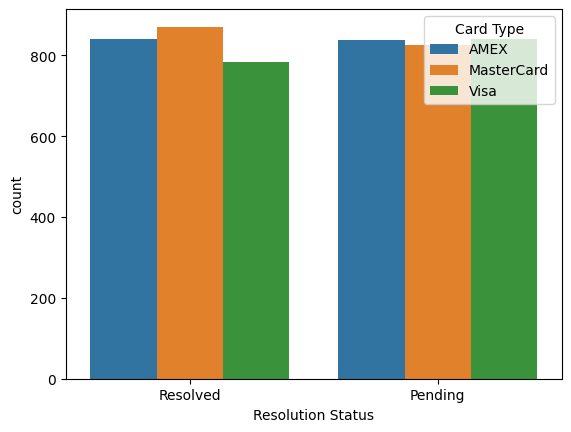

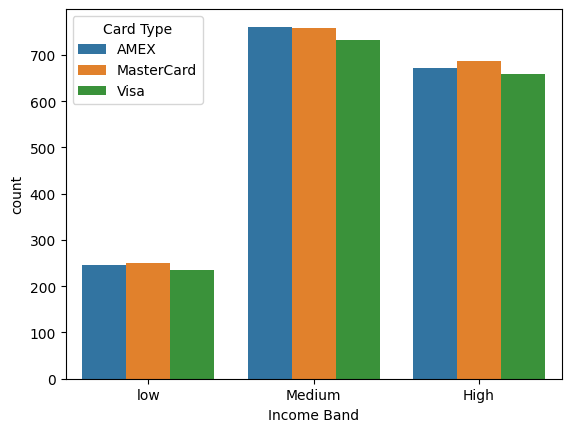

In [100]:
for i, predictor in enumerate(df[['Branch ID','Account Type','Loan Type', 'Gender','Loan ID', 'Card Type','Anomaly','Feedback Date','Feedback Type','Resolution Status','Income Band']]):
    plt.figure(i)
    sns.countplot(data=df, x = predictor, hue='Card Type')

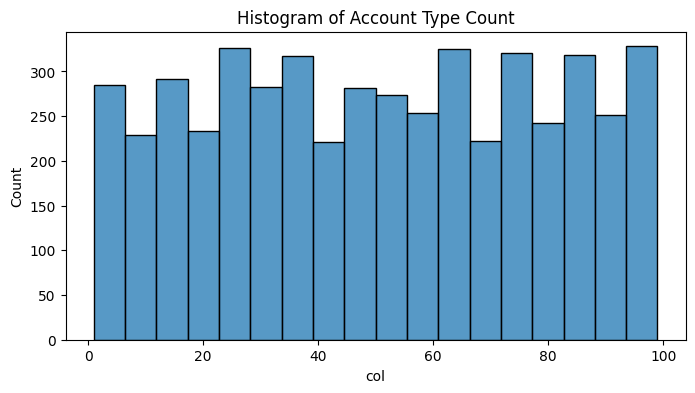

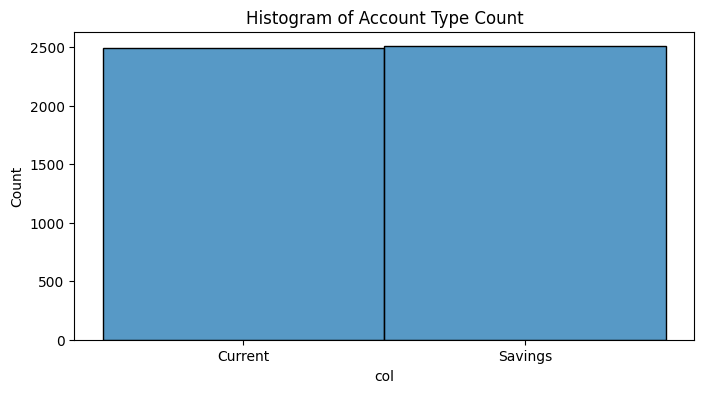

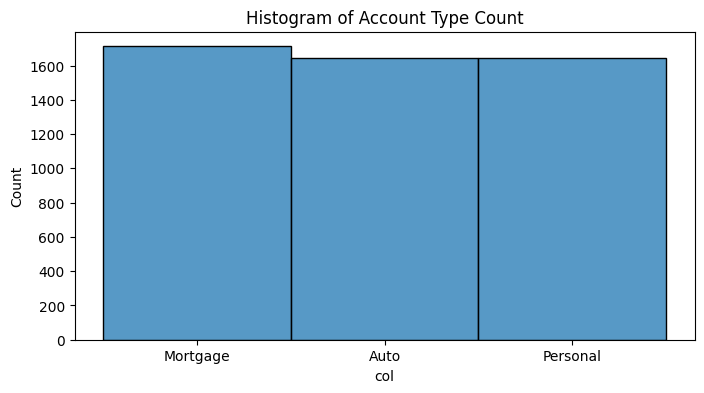

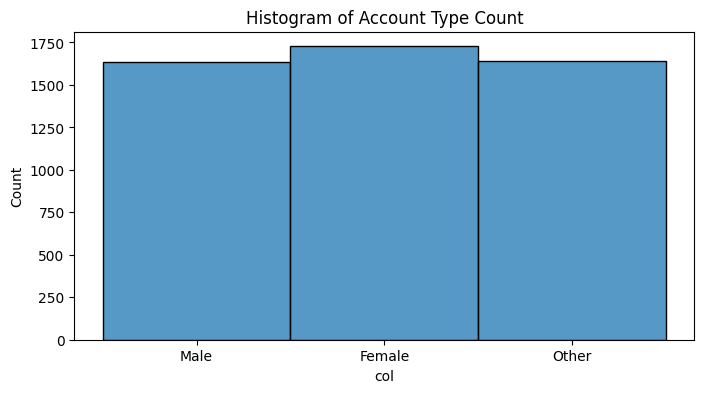

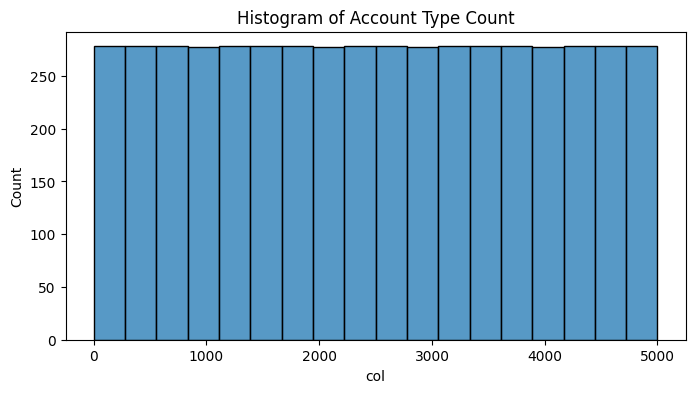

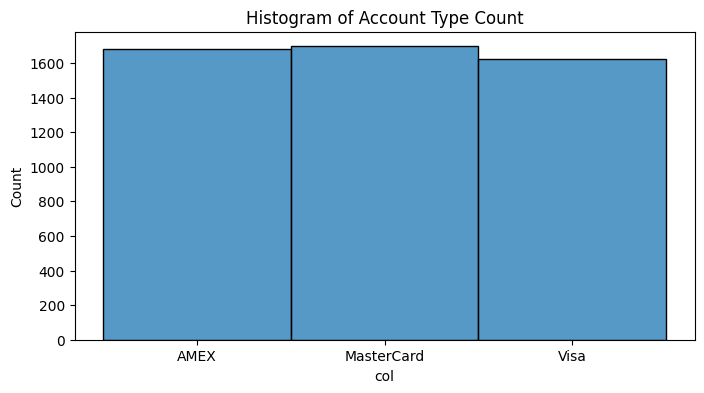

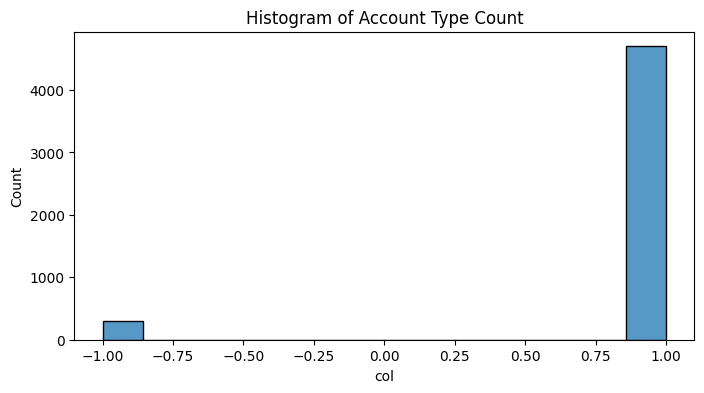

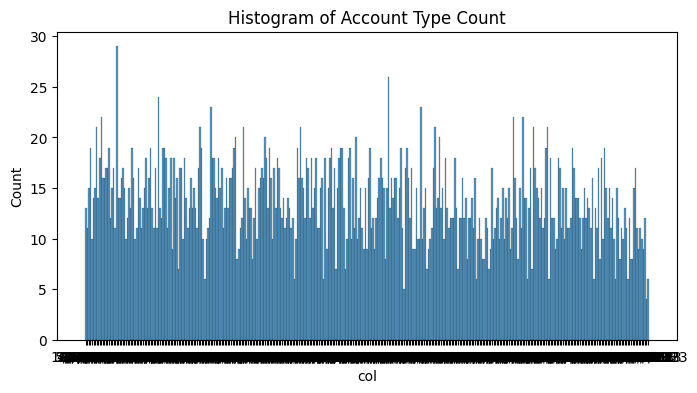

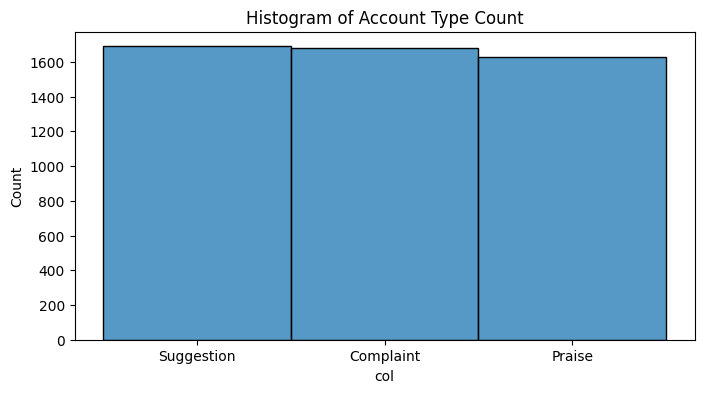

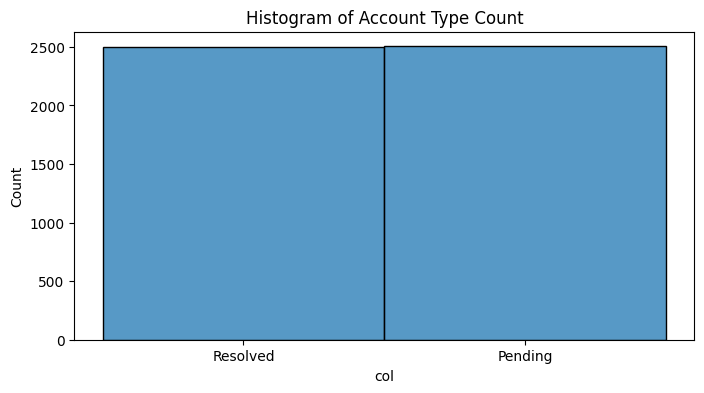

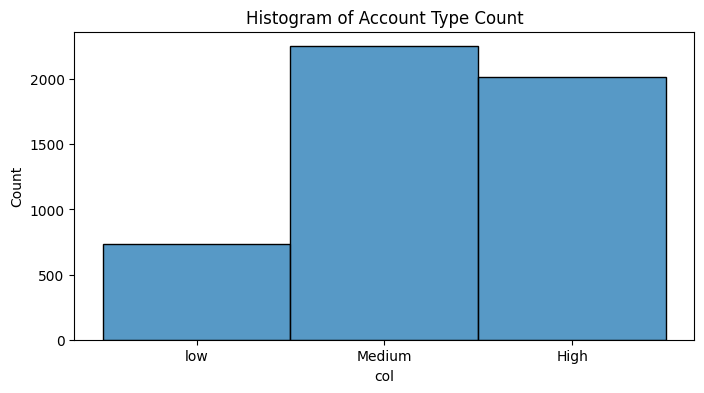

In [101]:
# Hist plot of value counts for different Account types

for col in categorical_cols:
    if col == 'Account type':
       continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Account Type Count')
    plt.xlabel('col')
    plt.ylabel('Count')
    plt.show()

# Numerical Analysis

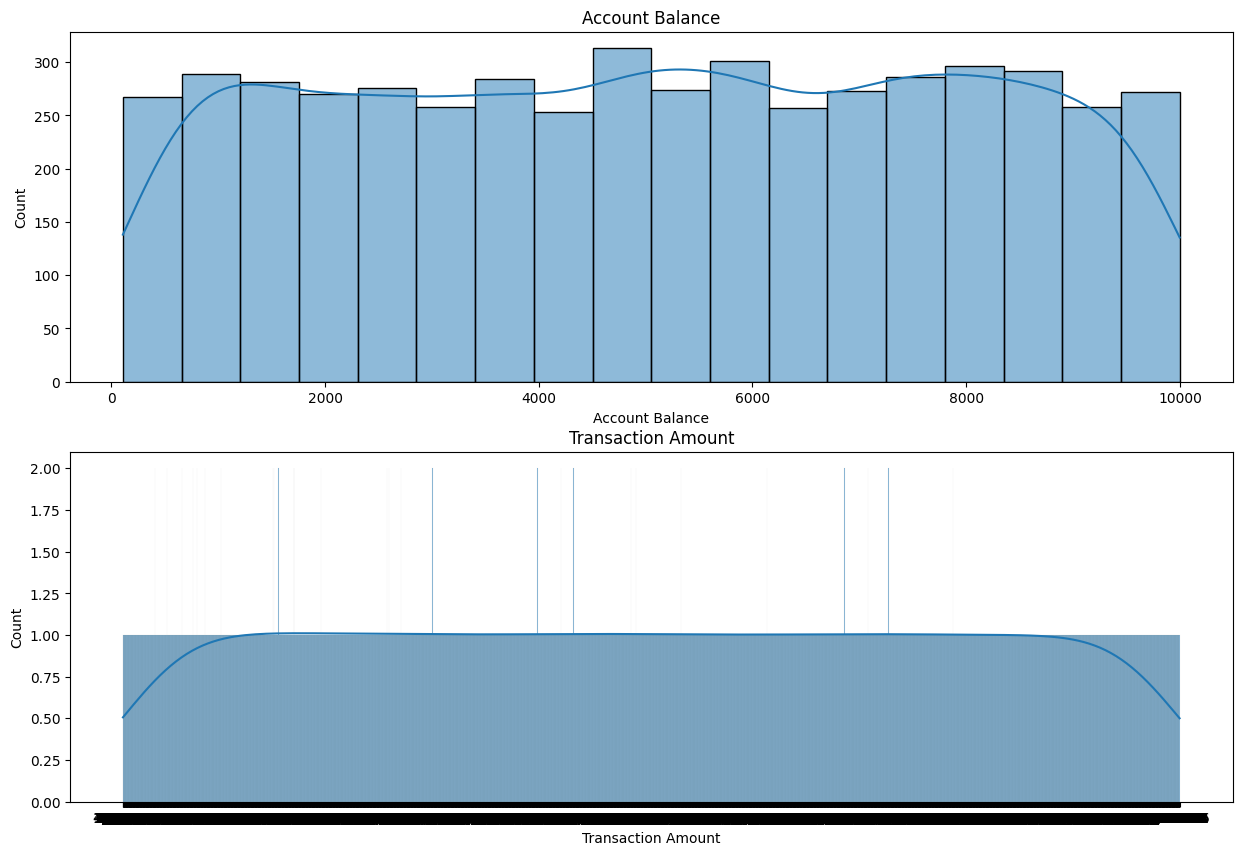

In [104]:
numerical_cols = ['Account Balance', 'Transaction Amount']

#Univariate analysis and visualization
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(2,1,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

# Numerical Analysis

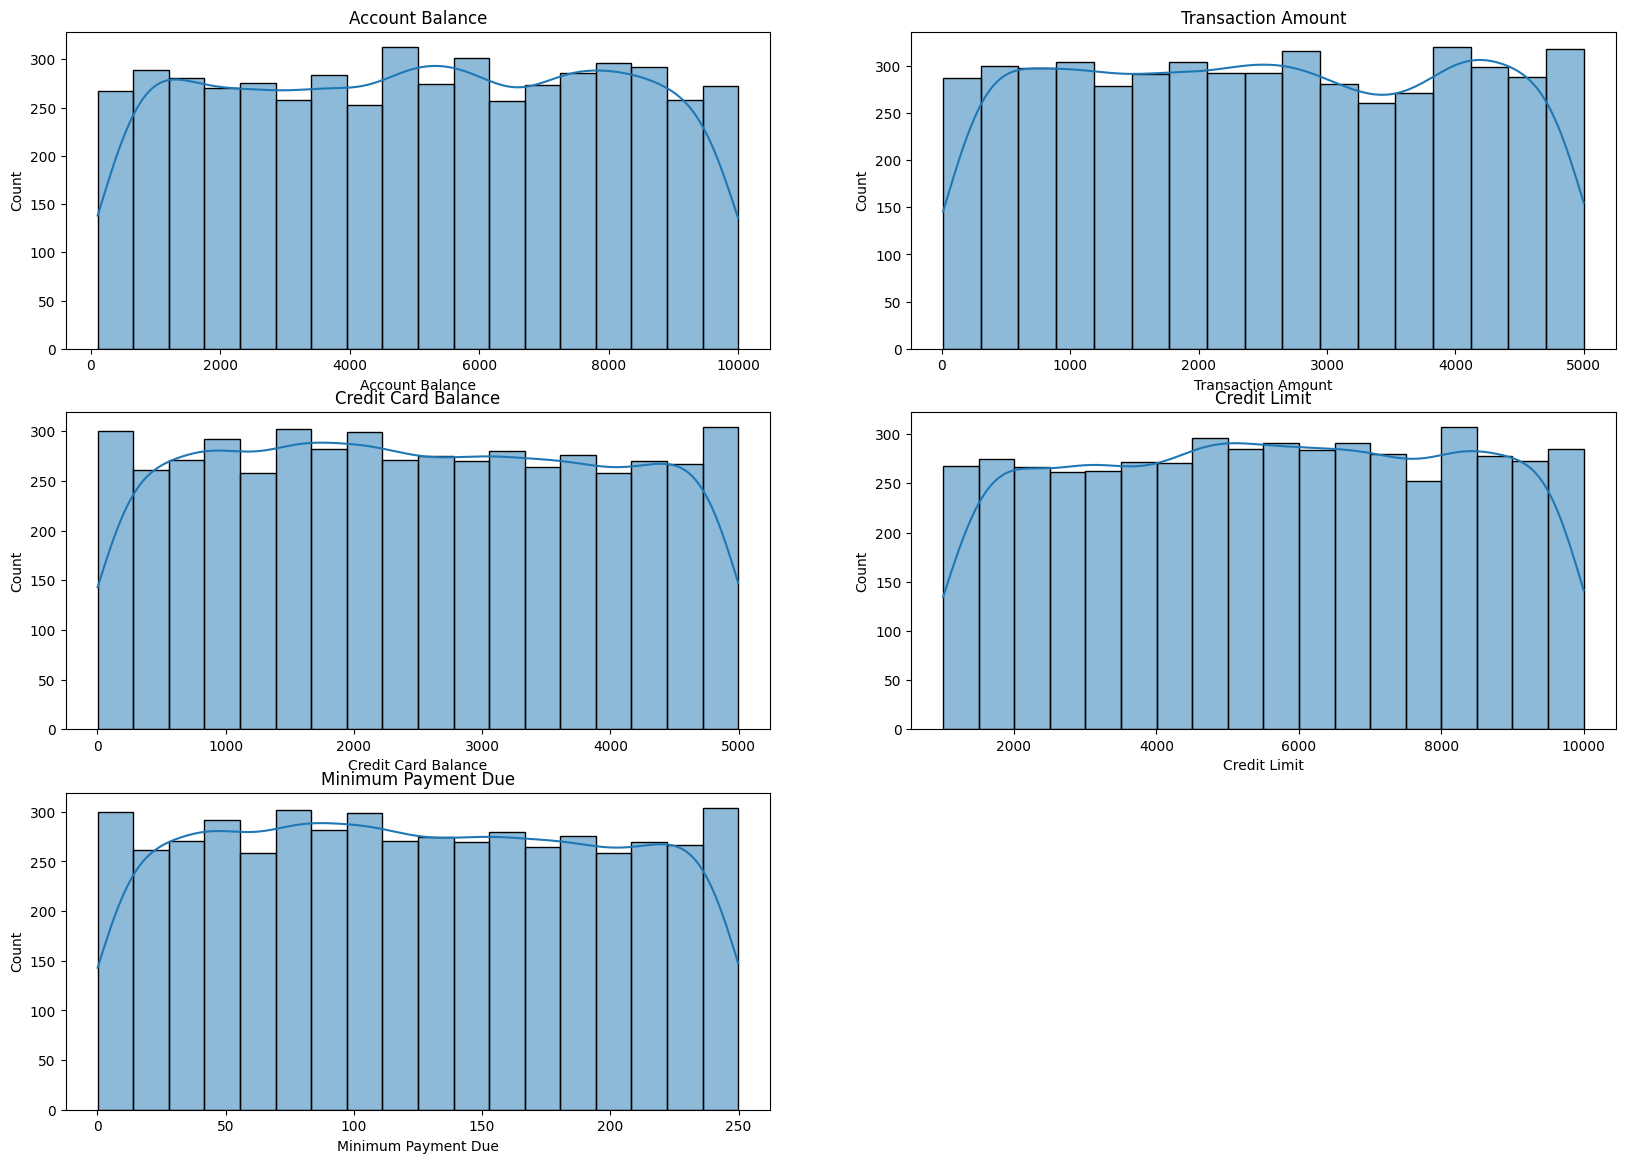

In [120]:
numerical_cols = ['Account Balance', 'Transaction Amount', 'Credit Card Balance','Credit Limit','Minimum Payment Due']

#Univariate analysis and visualization
plt.figure(figsize=(20,14))
for i,col in enumerate(numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

# Heatmaps

In [118]:
# Convert string  to float, 
for col in ['Account Balance', 'Transaction Amount', 'Credit Card Balance','Credit Limit','Minimum Payment Due']:
    df[col] = df[col].astype(str).str.replace(',','').astype(float)

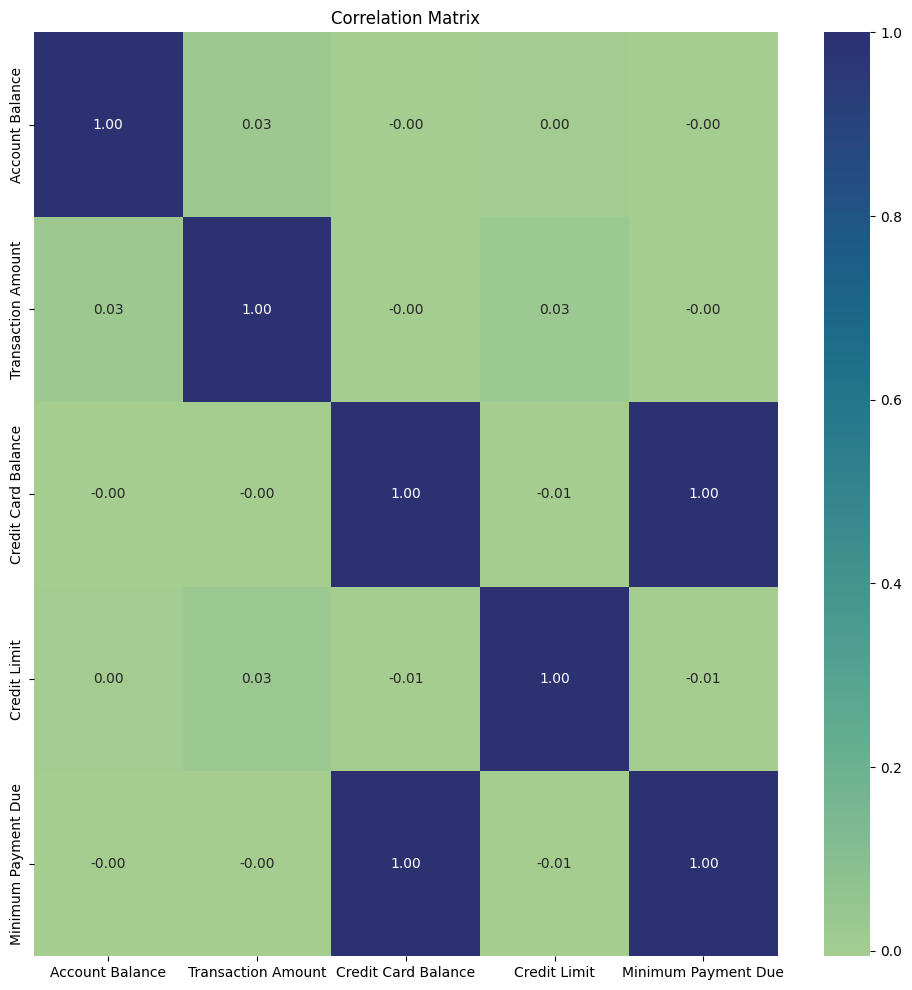

In [119]:
numerical_cols = ['Account Balance', 'Transaction Amount', 'Credit Card Balance','Credit Limit','Minimum Payment Due']

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True,cmap='crest',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()